In [18]:
import cv2 
import numpy as np

In [10]:
import cv2 
import numpy as np


img1 = np.empty((200,300),dtype=np.uint8)

img2 = np.zeros((200,300,3),dtype=np.uint8)

#그레이스케일 이미지, 흰바탕
img3 = np.ones((200,300),dtype=np.uint8)*255

img4 = np.full((200,300,3))

# cv2.imshow('img1',img1)
# cv2.imshow('img2',img2)
cv2.imshow('img3',img3)



cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
img = cv2.imread('a.jpg',cv2.IMREAD_COLOR)

gray = cv2.imread('a.jpg',cv2.IMREAD_GRAYSCALE)

cv2.imshow('img',img)
cv2.imshow('gray',gray)


cv2.waitKey(0)
cv2.destroyAllWindows()

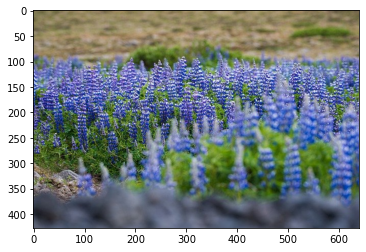

In [15]:
import cv2 
import matplotlib.pyplot as plt



img = cv2.imread('a.jpg')

#matplotlib bgr=> rgb
# b,g,r = cv2.split(img)
# img = cv2.merge([r,g,b])

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)



plt.plot()
plt.imshow(img)

## 동영상 찍기 -저장

In [25]:
import cv2 

#카메라 오픈
cap = cv2.VideoCapture(0)
#사용할 코덱 생성
codec = cv2.VideoWriter_fourcc(*'DIVX')

#동영상 작성자 객체 생성
out = cv2.VideoWriter('210806.avi',codec,25.0,(640,480))

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # 동영상 작성
        out.write(frame)
        cv2.imshow('frame', frame) # 현재 frame을 윈도우에 출력
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break


cap.release()
out.release()
cv2.destroyAllWindows()


드래깅


In [27]:
import cv2 
import numpy as np

src = cv2.imread('c.jpg')
h,w,c = src.shape
dst = np.full((h,w,c),[255,255,255],dtype=np.uint8)

p0 = None
p1 = None
roi = None



cv2.imshow('src',src)
cv2.imshow('dst',dst)

#좌표 따기 
def handler_src(event,x,y,flags,param):
    global p0, p1
    if event == cv2.EVENT_LBUTTONDOWN:
        p0 = (x,y)
    elif event == cv2.EVENT_LBUTTONUP:
        p1 = (x,y)
        make_roi()

def make_roi():
    global roi
    roi = src[p0[1]:p1[1],p0[0]:p1[0]]
    
def handler_dst(event,x,y,flags,param):
    global roi
    
    if event == cv2.EVENT_LBUTTONDOWN:
        if roi is not None:
            h,w,_ = roi.shape
            dst[y:y+h,x:x+h] = roi
            cv2.imshow('dst',dst)
            roi = None
            
cv2.setMouseCallback('src',handler_src)
cv2.setMouseCallback('dst',handler_dst)

while True:
    if cv2.waitKey(0) & 0xFF == 27:
        break
        
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: could not broadcast input array from shape (166,199,3) into shape (166,166,3)

ValueError: could not broadcast input array from shape (166,199,3) into shape (156,80,3)

ValueError: could not broadcast input array from shape (166,199,3) into shape (166,166,3)

7.이미지+연산 \
이미지 +100 : 픽셀값이 증가해서 색상 밝아짐.\
포화연산 (값이 255를 넘어가면 색상반전)조심.\
clip()으로 포화처리

8.이미지 - 연산\
이미지 -100: 픽셀값이 감소해서 색상이 어두어짐\
포화연산(값이 음수이면 색상반전)조심.\
clip()으로 포화값 처리

이미지-이미지: 두 이미지의 차 계산. 포화값 처리\
두 이미지의 차이 를 추출

9. 명암비 조절\
픽셀 중간값인 128을 기준으로 이보다 큰값은 더 밝게 만들고\
128보다 작은 값은 더 어둡게 만듦으로써 대비를 크게 함\

dst(x,y) = src(x,y) + (src(x,y)-128)*alpha\
128이상은 값을 더 더해주고,\
128미만은 값을 더 빼주고

In [29]:
def saturate_contrast2(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic+(pic-128)*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

original = cv2.imread('a.jpg')
img = saturate_contrast2(original,0.2)

cv2.imshow('original',original)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

명암비 확대 알고리즘 \
1) 히스토그램 스트레칭

In [ ]:
img = cv2.imread('b.jpg')
f_max = img.max()
f_min = img.min()
nframe  = img.astype('int64')
img6  = 

영상 필터링\
이미지에 음영을 넣어 올록볼록 보이도록 하는 필터링

In [30]:
import cv2 
import numpy as np

kernel = np.array([-1,-1,0,-1,0,1,0,1,1]).reshape(3,3)
img = cv2.imread('b.jpg',0)
dst = cv2.filter2D(img,-1,kernel,None,(-1,-1),128)
cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

블러링\
영상을 부드럽게 만드는 필터링. \
평균값 필터\
주변 픽셀 값의 평균값으로 필터링

In [39]:
img = cv2.imread('b.jpg',0)
k = 5 # 커널의 크기가 커질수록 뭉개짐이 심해짐
kernel = np.ones((k,k))/(k*k)
dst = cv2.filter2D(img,-1,kernel)
cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

블러링 -opencv 함수 이용 \

가우시안 필터링: 가우시안 분포 함수를 근사하여 생성한 커널로 필터링\
평균값 필터보다 자연스럽게 처리함\

cv2.GaussianBlur(img,ksize,sigmaX)\
ksize(w,h):커널 크기\
sigmaX: x방향 가우시안 커널 표준편차

In [40]:
img = cv2.imread('b.jpg',0)
cv2.imshow('img',img)

for i in range(1,6):
    dst = cv2.GaussianBlur(img,(5,5),i)
    cv2.imshow('dst'+str(i),dst)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

샤프닝 \
영상의 윤곽을 뚜렷하고 선명하게 하는 필터링\
언샤프닝 : 샤프닝을 위해서는 블러링 된 영상 사용

어파인 변환

In [2]:
import cv2 
import numpy as np

img = cv2.imread('c.jpg')
h,w,c  = img.shape

#변환 행렬 ,x축으로 -100, y축으로 -200 이동
M=np.float32([[1,0,+100],[0,1,+200]])

dst = cv2.warpAffine(img,M,(w,h))
cv2.imshow('Original',img)
cv2.imshow('Translation',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2 
import numpy as np

img = cv2.imread('c.jpg')

h,w,c = img.shape

# 이미지의 중심점을 기준으로 90도 회전하면서 0.5배 스케일 
M = cv2.getRotationMatrix2D((w/2,h/2),-90,1.2)

dst = cv2.warpAffine(img,M,(w,h))


cv2.imshow('original',img)
cv2.imshow('Rotation',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('c.jpg')